In [4]:
# load Heart.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



In [5]:
# Load the dataset
heart = pd.read_csv('Heart.csv')
# Display the first few rows of the dataset
print(heart.head())


   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  


In [6]:
# show the types of heart object
print(heart.dtypes)
type(heart)

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object


pandas.core.frame.DataFrame

In [7]:
# Display the shape of the dataset
print(heart.shape)

(303, 15)


In [8]:
# drop first and fourth columns
heart = heart.drop(heart.columns[[0, 3]], axis=1)
# Display the first few rows of the modified dataset
print(heart.head())
# Display the shape of the modified dataset
print(heart.shape)


   Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  Slope   Ca  \
0   63    1     145   233    1        2    150      0      2.3      3  0.0   
1   67    1     160   286    0        2    108      1      1.5      2  3.0   
2   67    1     120   229    0        2    129      1      2.6      2  2.0   
3   37    1     130   250    0        0    187      0      3.5      3  0.0   
4   41    0     130   204    0        2    172      0      1.4      1  0.0   

         Thal  AHD  
0       fixed   No  
1      normal  Yes  
2  reversable  Yes  
3      normal   No  
4      normal   No  
(303, 13)


In [9]:
# drop "Thal" column
heart = heart.drop('Thal', axis=1)
# Display the first few rows of the modified dataset
print(heart.head())
# Display the shape of the modified dataset
print(heart.shape)


   Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  Slope   Ca  \
0   63    1     145   233    1        2    150      0      2.3      3  0.0   
1   67    1     160   286    0        2    108      1      1.5      2  3.0   
2   67    1     120   229    0        2    129      1      2.6      2  2.0   
3   37    1     130   250    0        0    187      0      3.5      3  0.0   
4   41    0     130   204    0        2    172      0      1.4      1  0.0   

   AHD  
0   No  
1  Yes  
2  Yes  
3   No  
4   No  
(303, 12)


In [11]:
# check missing values
missing_values = heart.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

#indentify columns with missing values
missing_columns = heart.columns[heart.isnull().any()]
print("Columns with missing values:")
print(missing_columns)

# identify rows with missing values
missing_rows = heart[heart.isnull().any(axis=1)]
print("Rows with missing values:")
print(missing_rows)

# remve rows with missing values
heart = heart.dropna()
# Display the shape of the modified dataset
print("Shape after removing missing values:", heart.shape)


Missing values in each column:
Ca    4
dtype: int64
Columns with missing values:
Index(['Ca'], dtype='object')
Rows with missing values:
     Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  Slope  Ca
166   52    1     138   223    0        0    169      0      0.0      1 NaN
192   43    1     132   247    1        2    143      1      0.1      2 NaN
287   58    1     125   220    0        0    144      0      0.4      2 NaN
302   38    1     138   175    0        0    173      0      0.0      1 NaN
Shape after removing missing values: (299, 11)


In [13]:
#select last column as y
y = heart.iloc[:, -1]
# drop last column
heart = heart.drop(heart.columns[-1], axis=1)
# Display the first few rows of the modified dataset
print(heart.head())

   Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  Slope
0   63    1     145   233    1        2    150      0      2.3      3
1   67    1     160   286    0        2    108      1      1.5      2
2   67    1     120   229    0        2    129      1      2.6      2
3   37    1     130   250    0        0    187      0      3.5      3
4   41    0     130   204    0        2    172      0      1.4      1


In [14]:
# train test split, 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(heart, y, test_size=0.2, random_state=42)
# Display the shape of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (239, 10)
X_test shape: (60, 10)
y_train shape: (239,)
y_test shape: (60,)


In [15]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# head of the scaled data
print(X_train[:5])

[[ 0.81997596 -1.45048134  0.4099327   0.40250699 -0.40024264  0.98963379
   0.46124471 -0.70267347  2.17051952  2.20550543]
 [ 0.6000273  -1.45048134  1.39185392  1.11041657 -0.40024264  0.98963379
   0.50335222 -0.70267347 -0.88247214 -0.96989094]
 [-1.37951061  0.68942631 -0.68109086 -0.13320836  2.49848439 -1.02332345
   1.89290035 -0.70267347 -0.20402954  2.20550543]
 [ 0.27010431  0.68942631  1.77371217  0.80429351  2.49848439  0.98963379
  -1.05462598 -0.70267347 -0.0344189   0.61780724]
 [ 1.58979626 -1.45048134  0.4099327  -0.15234105 -0.40024264 -1.02332345
   0.08227703 -0.70267347  0.64402369 -0.96989094]]


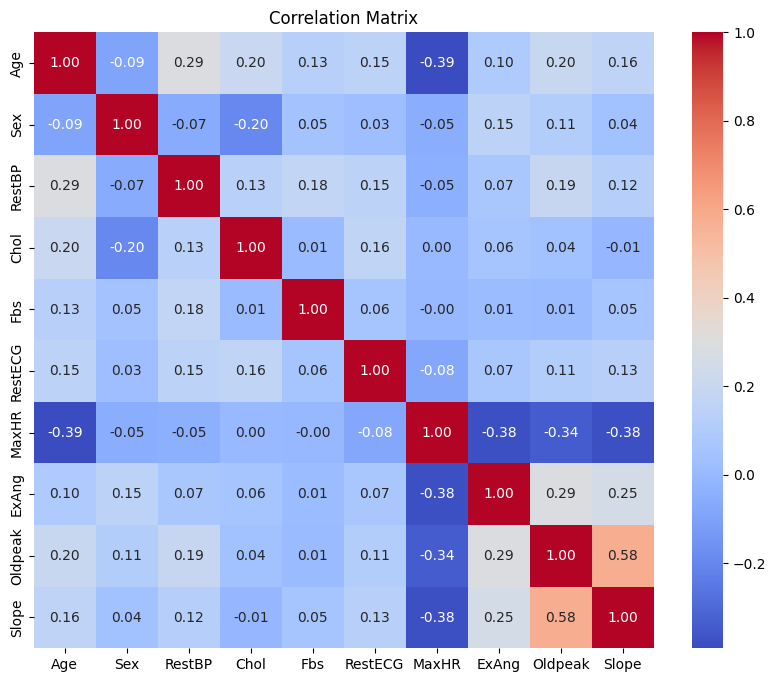

In [16]:
# matrix correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(heart.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [17]:
# verify missing values on X_train
missing_values = np.isnan(X_train).sum()
print("Missing values in X_train:", missing_values)

# verify missing values on X_train 
missing_values = np.isnan(X_test).sum()
print("Missing values in X_test:", missing_values)


Missing values in X_train: 0
Missing values in X_test: 0


In [18]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the classifier to the training data
knn.fit(X_train, y_train)
# Make predictions on the test data
y_pred = knn.predict(X_test)



In [19]:
#show some predictions
print("Predictions:", y_pred[:10])
# show some true values
print("True values:", y_test[:10].values)
# show accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Predictions: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
True values: [0. 1. 2. 0. 1. 1. 0. 0. 0. 2.]
Accuracy: 0.55


In [20]:
# make y_test a 0 1 array
y_test = y_test.to_numpy()
# make y_pred a 0 1 array
y_pred = pd.Series(y_pred).to_numpy()





In [23]:
# f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 score:", f1)



F1 score: 0.2786634460547504


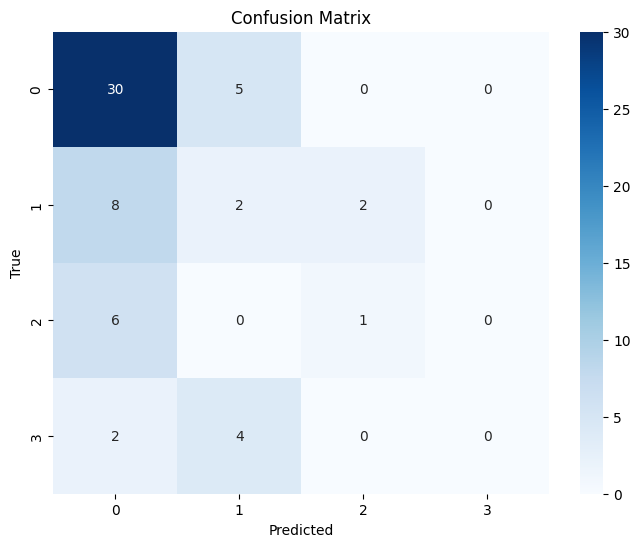

In [24]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
